In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api  as smf
from scipy.stats import norm

### 例題：上限のあるカウントデータ

In [2]:
data = pd.read_csv("data/data4a.csv")
data.head()

,N,y,x,f
0,8,1,9.76,C
1,8,6,10.48,C
2,8,5,10.83,C
3,8,6,10.94,C
4,8,1,9.37,C


In [3]:
data.describe()

,N,y,x
count,100.0,100.000000,100.000000
mean,8.0,5.080000,9.967200
std,0.0,2.743882,1.088954
min,8.0,0.000000,7.660000
25%,8.0,3.000000,9.337500
50%,8.0,6.000000,9.965000
75%,8.0,8.000000,10.770000
max,8.0,8.000000,12.440000


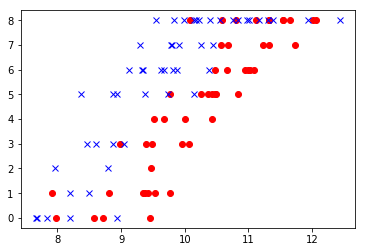

In [4]:
data_c = data[data['f'] == 'C']
data_t = data[data['f'] == 'T']
plt.plot(data_c['x'], data_c['y'], 'o', color='r', label='C')
plt.plot(data_t['x'], data_t['y'], 'x', color='b', label='T')

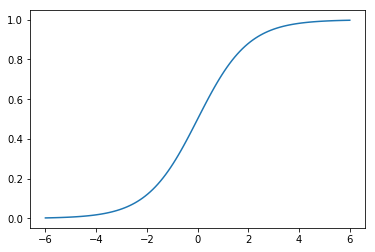

In [7]:
# ロジスティック関数の作図
def logistic(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-6, 6, 120)
plt.plot(z, logistic(z))

In [10]:
results = smf.glm(formula='y + I(N - y) ~ x + f', data=data, family=sm.families.Binomial()).fit(disp=0)

In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -133.11
Date:                Thu, 06 Dec 2018   Deviance:                       123.03
Time:                        18:18:52   Pearson chi2:                     13.7
No. Iterations:                     6                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.5361      1.414    -13.818      0.000     -22.307     -16.765
f[T.T]         2.0215      0.231      8.740      0.000       1.568       2.475
x              1.9524      0.139     14.059      0.000       1.680       2.225
==============================================================================
"""

In [12]:
formulas = [
    'y + I(N - y) ~ 1',
    'y + I(N - y) ~ x',
    'y + I(N - y) ~ f',
    'y + I(N - y) ~ x + f'
]
results = []
for formula in formulas:
    results.append(smf.glm(formula=formula, data=data, family=sm.families.Binomial()).fit(disp=0))
    
for i in range(4):
    print(formulas[i], ':', results[i].aic)

y + I(N - y) ~ 1 : 644.4093416623778
y + I(N - y) ~ x : 364.34544328371595
y + I(N - y) ~ f : 637.7597534566678
y + I(N - y) ~ x + f : 272.2111292852234


In [13]:
# 交互作用を入れた推定
results = smf.glm(formula='y + I(N - y) ~ x * f', data=data, family=sm.families.Binomial()).fit(disp=0)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -132.81
Date:                Thu, 06 Dec 2018   Deviance:                       122.43
Time:                        18:28:11   Pearson chi2:                     13.6
No. Iterations:                     6                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.5233      1.886     -9.821      0.000     -22.220     -14.827
f[T.T]        -0.0638      2.704     -0.024      0.981      -5.363       5.235
x              1.8525      0.186      9.983      0.000       1.489       2.216
x:f[T.T]       0.2163      0.280      0.772      0.440      -0.333       0.765
==============================================================================
"""

In [14]:
results.aic

273.61059672597406

### オフセット項わざ

In [15]:
data = pd.read_csv("data/data4b.csv")
data.head()

,y,x,A
0,57,0.68,10.3
1,64,0.27,15.6
2,49,0.46,10.0
3,64,0.45,14.9
4,82,0.74,14.0


In [18]:
results = smf.glm(formula='y ~ x',offset=np.log(data['A']), data=data, family=sm.families.Poisson()).fit(disp=0)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -323.17
Date:                Thu, 06 Dec 2018   Deviance:                       81.608
Time:                        18:40:57   Pearson chi2:                     81.5
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9731      0.045     21.600      0.000       0.885       1.061
x              1.0383      0.078     13.364      0.000       0.886       1.191
==============================================================================
"""

### 正規分布とその尤度

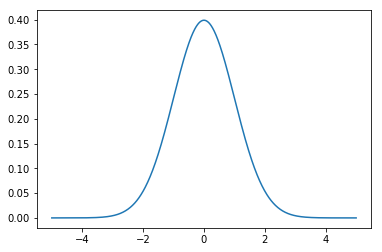

In [20]:
x = np.linspace(-5, 5, 1000)
plt.plot(x, norm.pdf(x, 0, 1))

In [24]:
# p(1.2 <= y <= 1.8 | μ,σ) 
norm.cdf(1.8, 0, 1) - norm.cdf(1.2, 0, 1)

0.07913935110878245